In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [41]:
cofactorsmapped = pd.read_csv("data/cofactors_mapped_combined.csv").drop("Unnamed: 0", axis = 1)
baf = cofactorsmapped[cofactorsmapped["Complex"] == "BAF"].set_index("Bgee")
baf["Subcomplex or Module"] = baf["Subcomplex or Module"].apply(lambda x: x.replace("]", "").replace("[", "").split(", "))
baf.head()

,Gene Name,Complex,Subcomplex or Module,Own-complex paralog,Other-complex Paralogues,Notes,Source,UniprotID,Entry Name,Protein names,Gene Names,Sequence,Ensembl,GeneID,PDB,Primary Gene Name
Bgee,,,,,,,,,,,,,,,,
ENSG00000163939,BAF180,BAF,[esBAF],NaN,NaN,NaN,Alfert et al. Epigenetics & Chromatin (2019),Q86U86,PB1_HUMAN,Protein polybromo-1 (hPB1) (BRG1-associated fa...,PBRM1 BAF180 PB1,MGSKRRRATSPSSSVSGDFDDGHHSVSTPGPSRKRRRLSNLPTVDP...,ENST00000296302.11 [Q86U86-1];ENST00000337303....,55193.0,2KTB;3G0J;3HMF;3IU5;3IU6;3K2J;3LJW;3MB4;3TLP;4...,PBRM1
ENSG00000163939,BAF180,BAF,[npBAF],NaN,NaN,NaN,Alfert et al. Epigenetics & Chromatin (2019),Q86U86,PB1_HUMAN,Protein polybromo-1 (hPB1) (BRG1-associated fa...,PBRM1 BAF180 PB1,MGSKRRRATSPSSSVSGDFDDGHHSVSTPGPSRKRRRLSNLPTVDP...,ENST00000296302.11 [Q86U86-1];ENST00000337303....,55193.0,2KTB;3G0J;3HMF;3IU5;3IU6;3K2J;3LJW;3MB4;3TLP;4...,PBRM1
ENSG00000163939,BAF180,BAF,[nBAF],NaN,NaN,NaN,Alfert et al. Epigenetics & Chromatin (2019),Q86U86,PB1_HUMAN,Protein polybromo-1 (hPB1) (BRG1-associated fa...,PBRM1 BAF180 PB1,MGSKRRRATSPSSSVSGDFDDGHHSVSTPGPSRKRRRLSNLPTVDP...,ENST00000296302.11 [Q86U86-1];ENST00000337303....,55193.0,2KTB;3G0J;3HMF;3IU5;3IU6;3K2J;3LJW;3MB4;3TLP;4...,PBRM1
ENSG00000119866,BCL11A,BAF,[esBAF],[BCL11B],NaN,NaN,Alfert et al. Epigenetics & Chromatin (2019),Q9H165,BC11A_HUMAN,B-cell lymphoma/leukemia 11A (BCL-11A) (B-cell...,BCL11A CTIP1 EVI9 KIAA1809 ZNF856,MSRRKQGKPQHLSKREFSPEPLEAILTDDEPDHGPLGAPEGDHDLL...,ENST00000335712.11 [Q9H165-6];ENST00000356842....,53335.0,5VTB;6KI6;6U9Q;8DTN;8DTU;8THO;8TLO;9BV0;,BCL11A
ENSG00000119866,BCL11A,BAF,[npBAF],[BCL11B],NaN,NaN,Alfert et al. Epigenetics & Chromatin (2019),Q9H165,BC11A_HUMAN,B-cell lymphoma/leukemia 11A (BCL-11A) (B-cell...,BCL11A CTIP1 EVI9 KIAA1809 ZNF856,MSRRKQGKPQHLSKREFSPEPLEAILTDDEPDHGPLGAPEGDHDLL...,ENST00000335712.11 [Q9H165-6];ENST00000356842....,53335.0,5VTB;6KI6;6U9Q;8DTN;8DTU;8THO;8TLO;9BV0;,BCL11A


In [42]:
scrna = pd.read_csv("helperdata/cofactor_scRNA.csv").drop("Unnamed: 0", axis = 1)
scRNA_baf = scrna[[x in baf.index.to_list() for x in scrna["Ensembl"]]].set_index("Ensembl")
scRNA_baf.head()

,Gene,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000011332,DPF1,0.3,0.0,0.0,3.1,0.1,1.3,0.0,1.0,0.0,...,2.7,1.0,1.1,9.2,10.6,0.3,0.9,0.1,0.1,0.6
ENSG00000028310,BRD9,33.5,38.0,22.1,12.4,29.8,32.4,20.6,10.6,31.7,...,19.0,26.3,25.5,45.9,50.8,31.3,28.6,19.8,50.3,21.1
ENSG00000049618,ARID1B,86.0,55.7,82.9,268.1,137.4,77.3,99.9,47.2,71.4,...,70.7,148.3,79.1,18.2,29.5,64.7,81.6,51.5,98.9,64.3
ENSG00000066117,SMARCD1,29.7,26.9,21.9,10.5,40.5,23.7,25.3,17.1,33.0,...,24.5,19.5,26.1,28.8,35.6,31.2,22.6,8.6,33.5,19.4
ENSG00000073584,SMARCE1,36.3,27.9,21.3,12.4,49.8,22.7,25.1,23.6,46.8,...,10.9,20.5,34.8,24.9,22.2,44.1,24.4,34.8,37.1,19.8


In [43]:
specificity = pd.read_csv("helperdata/cofactor_specificity.csv").drop("Unnamed: 0", axis = 1)
scRNA_specificity = specificity[[x in baf.index.to_list() for x in specificity["Ensembl"]]].set_index("Ensembl")
scRNA_specificity.head()

,Gene,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,,,,,,,,,,,,,,
ENSG00000011332,DPF1,Tissue enriched,Detected in some,13.0,{'brain': '33.4'},Cell type enhanced,Detected in some,NaN,"{'Bipolar cells': '13.0', 'Early spermatids': ...",Low cell type specificity,Detected in many,NaN,NaN,0.92,Not detected,0.26,0.82,0.32
ENSG00000028310,BRD9,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.25,0.29,0.05,0.27,0.16
ENSG00000049618,ARID1B,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,"{'Inhibitory neurons': '455.0', 'Oligodendrocy...",Low cell type specificity,Detected in all,NaN,NaN,0.20,0.39,0.08,0.29,0.07
ENSG00000066117,SMARCD1,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.21,0.28,0.05,0.28,0.15
ENSG00000073584,SMARCE1,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.17,0.08,0.07,0.20,0.21


In [44]:
scRNA_taus = scRNA_specificity[[x for x in scRNA_specificity.columns.to_list() if "TAU" in x]]
scRNA_taus = scRNA_taus.applymap(lambda x: np.NaN if x == "Not detected" else float(x))
scRNA_taus.head()

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_73067/1983826795.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scRNA_taus = scRNA_taus.applymap(lambda x: np.NaN if x == "Not detected" else float(x))


,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,
ENSG00000011332,0.92,NaN,0.26,0.82,0.32
ENSG00000028310,0.25,0.29,0.05,0.27,0.16
ENSG00000049618,0.20,0.39,0.08,0.29,0.07
ENSG00000066117,0.21,0.28,0.05,0.28,0.15
ENSG00000073584,0.17,0.08,0.07,0.20,0.21


In [45]:
baf_combined = scRNA_baf[["Gene"]].copy()
baf_combined = baf_combined.join(baf[["Subcomplex or Module"]])
baf_combined["Fraction Expressed"] = scRNA_baf.apply(lambda x: np.count_nonzero(x)/len(x), axis=1)
baf_combined = baf_combined.join(scRNA_taus)
baf_combined.head()

,Gene,Subcomplex or Module,Fraction Expressed,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,,,,
ENSG00000011332,DPF1,[nBAF],0.658537,0.92,NaN,0.26,0.82,0.32
ENSG00000028310,BRD9,[esBAF],1.000000,0.25,0.29,0.05,0.27,0.16
ENSG00000028310,BRD9,[npBAF],1.000000,0.25,0.29,0.05,0.27,0.16
ENSG00000028310,BRD9,[nBAF],1.000000,0.25,0.29,0.05,0.27,0.16
ENSG00000049618,ARID1B,[npBAF],1.000000,0.20,0.39,0.08,0.29,0.07


In [46]:
def get_module(modulename):
    module = baf_combined[[modulename in x for x in baf_combined["Subcomplex or Module"]]].drop("Subcomplex or Module", axis = 1).set_index("Gene")
    return module

def meltmodule(moduledf, taulist):
    moduleplt = moduledf.reset_index().drop("Fraction Expressed", axis=1).melt(id_vars="Gene", var_name="Category", value_name="Tau Score")
    moduleplt["Category"] = moduleplt["Category"].apply(lambda x: x.replace("TAU score - ", ""))
    moduleplt["Specificity"] = moduleplt["Tau Score"].apply(lambda x: "Specific" if x > 0.4 else "Unspecific")
    moduleplt = moduleplt[[x in taulist for x in moduleplt["Category"]]]
    return moduleplt


In [47]:
baf_combined["Subcomplex or Module"].explode().unique()


array(['nBAF', 'esBAF', 'npBAF', 'endogenous'], dtype=object)

In [48]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [63]:
module = get_module("endogenous")
endogenousgenes = module.index.to_list()

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_73067/4236845216.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0)


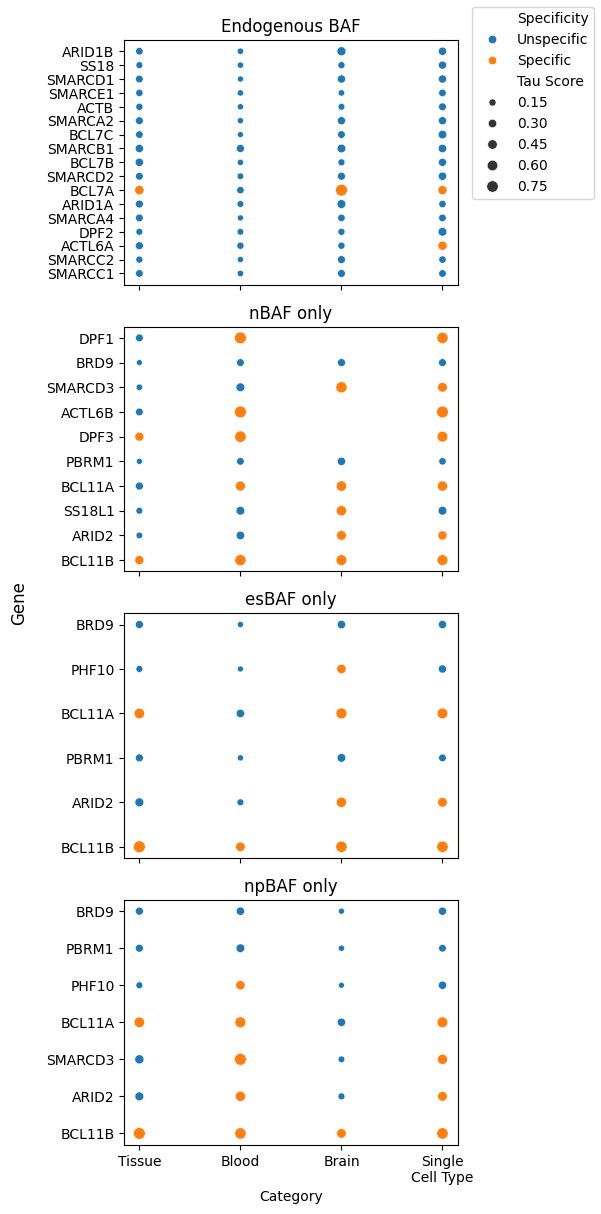

In [66]:

labellst = ["endogenous", "nBAF", "esBAF", "npBAF"]
taulst = ["Tissue", "Single Cell Type", "Blood", "Brain"]

fig, axs = plt.subplots(len(labellst), figsize = (6, 12), sharex=True)
fig.supylabel("Gene")

for label_i in range(len(labellst)):
    label = labellst[label_i]
    module = get_module(label)
    moduleplt = meltmodule(module, taulst).sort_values("Specificity", ascending = False)
    if label != "endogenous":
        moduleplt = moduleplt[[x not in endogenousgenes for x in moduleplt["Gene"]]]

    sns.scatterplot(moduleplt, y = "Gene", x = "Category", size = "Tau Score", hue = "Specificity", ax= axs[label_i], legend=True)
    handles, labels = axs[label_i].get_legend_handles_labels()
    axs[label_i].clear()
    sns.scatterplot(moduleplt, y = "Gene", x = "Category", size = "Tau Score", hue = "Specificity", ax= axs[label_i], legend=False)
    axs[label_i].set_ylabel('')
    if label != "endogenous":
        axs[label_i].set_title(label + " only")
    else:
        axs[label_i].set_title("Endogenous BAF")


plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Prevent overlap, leave space for legend
fig.legend(
    handles=handles,
    labels=labels,
    loc = "upper right"
)
plt.tight_layout(rect=[0, 0, 0.85, 1])
wrap_labels(axs[label_i], 10)

plt.savefig("figures/bafspecificity.png")


In [51]:
def RNAcellspecificity(df):
    df = df[["Gene", "RNA single cell type specific nTPM"]]

    cellspecific_cells = pd.DataFrame({"Cell Type": [], "Genes": []}).set_index("Cell Type")

    for _, row in df.iterrows():
        celldict = row["RNA single cell type specific nTPM"]
        if pd.notna(celldict):
            cell_dict = ast.literal_eval(celldict)
            for cell, _ in cell_dict.items():
                if cell not in cellspecific_cells.index.to_list():
                    cellspecific_cells.loc[cell] = [[]]
                cellspecific_cells.at[cell, "Genes"].append(row["Gene"])

    return cellspecific_cells

def subcomplex_RNAcellspecificity(label):
    module = meltmodule(get_module(label), taulst)
    modulespecific = module[module["Specificity"] == "Specific"]
    modulespecific = scRNA_specificity[[x in modulespecific["Gene"].unique() for x in scRNA_specificity["Gene"]]]
    return RNAcellspecificity(modulespecific)


engodenous = subcomplex_RNAcellspecificity("endogenous")
nBAF = subcomplex_RNAcellspecificity("nBAF")
npBAF = subcomplex_RNAcellspecificity("npBAF")
esBAF = subcomplex_RNAcellspecificity("esBAF")

In [52]:
engodenous

,Genes
Cell Type,
dendritic cells,[BCL7A]
Oocytes,[ACTL6A]
Spermatocytes,[ACTL6A]


In [53]:
nBAF

,Genes
Cell Type,
Bipolar cells,[DPF1]
Early spermatids,"[DPF1, ARID2, DPF3]"
Excitatory neurons,"[DPF1, ACTL6B, BCL11A]"
Horizontal cells,"[DPF1, ACTL6B]"
Inhibitory neurons,"[DPF1, ACTL6B, BCL11A, BCL11B]"
Late spermatids,"[DPF1, ARID2]"
Oligodendrocyte precursor cells,"[DPF1, DPF3]"
Spermatogonia,[DPF1]
Cone photoreceptor cells,"[ACTL6B, DPF3]"


In [54]:
npBAF

,Genes
Cell Type,
Cardiomyocytes,[SMARCD3]
Peritubular cells,[SMARCD3]
Skeletal myocytes,[SMARCD3]
dendritic cells,"[BCL7A, BCL11A]"
B-cells,[BCL11A]
Basal squamous epithelial cells,"[BCL11A, BCL11B]"
Excitatory neurons,[BCL11A]
Inhibitory neurons,"[BCL11A, BCL11B]"
Langerhans cells,[BCL11A]


In [55]:
esBAF

,Genes
Cell Type,
dendritic cells,"[BCL7A, BCL11A]"
B-cells,[BCL11A]
Basal squamous epithelial cells,"[BCL11A, BCL11B]"
Excitatory neurons,[BCL11A]
Inhibitory neurons,"[BCL11A, BCL11B]"
Langerhans cells,[BCL11A]
Squamous epithelial cells,[BCL11A]
Basal keratinocytes,[BCL11B]
NK-cells,[BCL11B]


In [70]:
import ast

In [74]:
def fixstringlist(strng):
    strng = strng.replace("[", "").replace("]", "")
    return strng.split(", ")

baf["Own-complex paralog"] = [fixstringlist(x) if pd.notna(x) else x for x in baf["Own-complex paralog"]]
baf["Other-complex Paralogues"] = [fixstringlist(x) if pd.notna(x) else x for x in baf["Other-complex Paralogues"]]

In [118]:
hasowncomplexparalog = baf[[isinstance(x, list) for x in baf["Own-complex paralog"]]]
hasowncomplexparalog["Paralog Pair"] =  hasowncomplexparalog.apply(lambda x: sorted(x["Own-complex paralog"] + [x["Gene Name"]]), axis = 1)
owncomplexparalogs = hasowncomplexparalog[["Subcomplex or Module", "Paralog Pair"]]
owncomplexparalogs["Subcomplex or Module"] = owncomplexparalogs["Subcomplex or Module"].apply(lambda x: x[0])
owncomplexparalogs["Paralog Pair"]


owncomplexparalogs["Paralog 1"] = [x[0] for x in owncomplexparalogs["Paralog Pair"]]
owncomplexparalogs["Paralog 2"] = [x[1] for x in owncomplexparalogs["Paralog Pair"]]
owncomplexparalogs["Paralog 3"] = [x[2] if len(x) > 2 else np.NaN for x in owncomplexparalogs["Paralog Pair"] ]

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_73067/2903347542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hasowncomplexparalog["Paralog Pair"] =  hasowncomplexparalog.apply(lambda x: sorted(x["Own-complex paralog"] + [x["Gene Name"]]), axis = 1)
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_73067/2903347542.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  owncomplexparalogs["Subcomplex or Module"] = owncomplexparalogs["Subcomplex or Module"].apply(lambda x: x[0])
/var/f

In [95]:
#get scRNA data for each paralog pair, calculate correlation

In [99]:
import scipy.stats as stat

In [139]:
mapper = cofactorsmapped[["Gene Names", "Bgee"]]
mapper["Gene Names"] = mapper["Gene Names"].apply(lambda x: x.split(" "))

mapper = mapper.explode("Gene Names").rename({"Bgee": "Ensembl", "Gene Names": "Gene Name"}, axis=1)
def mapper_ensembl_getter(string):
    """
    Gets list fo ensembls for specific genes
    """
    filtered = mapper[[string in x for x in mapper["Gene Name"]]]
    return list(filtered["Ensembl"].unique())[0]


def getarray(ensembl):
    return scrna[scrna["Ensembl"] == ensembl].drop("Ensembl", axis=1).set_index("Gene").iloc[0]

def getcorr(arr1, arr2):
    return stat.pearsonr(arr1, arr2), stat.spearmanr(arr1, arr2, nan_policy = "omit")


def corr_main(gene1, gene2):
    ensembl1 = mapper_ensembl_getter(gene1)
    ensembl2 = mapper_ensembl_getter(gene2)
    pearson, spearman = getcorr(getarray(ensembl1), getarray(ensembl2))
    return pearson[0], spearman[0]

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_73067/1948385851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mapper["Gene Names"] = mapper["Gene Names"].apply(lambda x: x.split(" "))


In [140]:
owncomplexparalogsunique = owncomplexparalogs[["Paralog 1", "Paralog 2", "Paralog 3"]].drop_duplicates()
owncomplexparalogsunique
owncomplexparalogsunique[["Pearsons", "Spearmans"]] = owncomplexparalogsunique.apply(lambda x: pd.Series(corr_main(x["Paralog 1"], x["Paralog 2"])), axis=1)
owncomplexparalogsunique

,Paralog 1,Paralog 2,Paralog 3,Pearsons,Spearmans
Bgee,,,,,
ENSG00000119866,BCL11A,BCL11B,NaN,0.150753,0.608731
ENSG00000066117,BAF60A,BAF60B,NaN,-0.116374,-0.040666
ENSG00000066117,BAF60A,BAF60C,NaN,-0.075310,0.013694
ENSG00000066117,SMARCD1,SMARCD2,NaN,-0.116374,-0.040666
ENSG00000117713,BAF250A,BAF250B,NaN,0.481336,0.556416
ENSG00000117713,ARID1A,ARID1B,NaN,0.481336,0.556416
ENSG00000130024,BAF45A,BAF45D,NaN,-0.229089,-0.051936
ENSG00000173473,SMARCC1,SMARCC2,NaN,-0.169193,-0.064634
ENSG00000127616,BRG1,BRM,NaN,-0.144141,-0.129285


In [146]:
from itertools import permutations

In [171]:
bafgenes = baf[["Gene Name"]].reset_index().groupby("Bgee").agg(list)
bafgenes["Gene Name"] = bafgenes["Gene Name"].apply(lambda x: x[0])
uniquegenes = bafgenes["Gene Name"].unique()
bafgenes

,Gene Name
Bgee,
ENSG00000011332,BAF45B
ENSG00000028310,BRD9
ENSG00000049618,BAF250B
ENSG00000066117,BAF60A
ENSG00000073584,BAF57
ENSG00000075624,ACTB
ENSG00000077080,BAF53B
ENSG00000080503,BRM
ENSG00000082014,BAF60C


In [148]:
pairs = list(permutations(uniquegenes, 2))

# Convert to a DataFrame
allbafpairs = pd.DataFrame(pairs, columns=['Gene 1', 'Gene 2'])
allbafpairs[["Pearson", "Spearman"]] = allbafpairs.apply(lambda x: pd.Series(corr_main(x["Gene 1"], x["Gene 2"])), axis=1)
bafpearson = allbafpairs.pivot_table(index="Gene 1", columns="Gene 2", values="Pearson")
bafspearman = allbafpairs.pivot_table(index="Gene 1", columns="Gene 2", values="Spearman")

In [165]:
owncomplexparalogsunique

,Paralog 1,Paralog 2,Paralog 3,Pearsons,Spearmans
Bgee,,,,,
ENSG00000119866,BCL11A,BCL11B,NaN,0.150753,0.608731
ENSG00000066117,BAF60A,BAF60B,NaN,-0.116374,-0.040666
ENSG00000066117,BAF60A,BAF60C,NaN,-0.075310,0.013694
ENSG00000066117,SMARCD1,SMARCD2,NaN,-0.116374,-0.040666
ENSG00000117713,BAF250A,BAF250B,NaN,0.481336,0.556416
ENSG00000117713,ARID1A,ARID1B,NaN,0.481336,0.556416
ENSG00000130024,BAF45A,BAF45D,NaN,-0.229089,-0.051936
ENSG00000173473,SMARCC1,SMARCC2,NaN,-0.169193,-0.064634
ENSG00000127616,BRG1,BRM,NaN,-0.144141,-0.129285


/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_73067/2323980161.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ensembl1 = mapper_ensembl_getter(owncomplexparalogsunique["Paralog 1"][i])
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_73067/2323980161.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ensembl2 = mapper_ensembl_getter(owncomplexparalogsunique["Paralog 2"][i])
/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_73067/2323980161.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated 

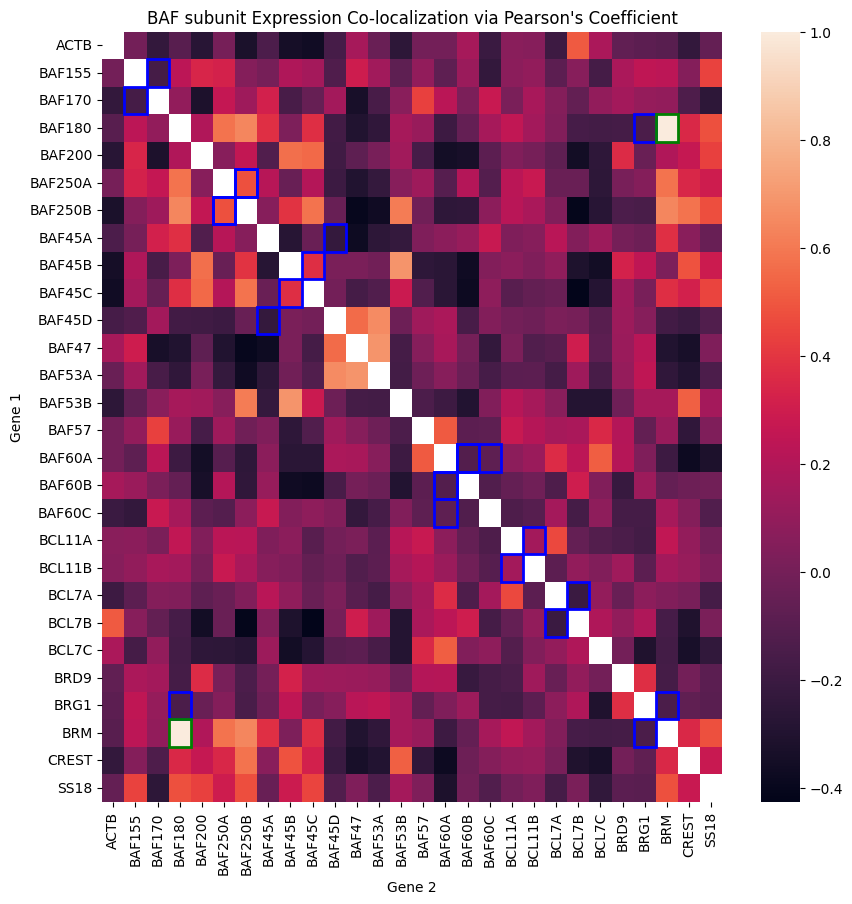

In [ ]:
plt.figure(figsize=(10,10))

sns.heatmap(bafpearson)

def highlight_cells(data, threshold=0.75):
    # Create a mask for cells to be highlighted
    mask = data > threshold
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if mask.iloc[i, j]:  # If value is above the threshold
                plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='green', lw=2))


for i in range(len(owncomplexparalogsunique)):
    ensembl1 = mapper_ensembl_getter(owncomplexparalogsunique["Paralog 1"][i])
    ensembl2 = mapper_ensembl_getter(owncomplexparalogsunique["Paralog 2"][i])
    x = bafpearson.index.get_loc(bafgenes.loc[ensembl1][0]) 
    y = bafpearson.index.get_loc(bafgenes.loc[ensembl2][0])
    plt.gca().add_patch(plt.Rectangle((x, y), 1, 1, fill=False, edgecolor='blue', lw=2))
    plt.gca().add_patch(plt.Rectangle((y, x), 1, 1, fill=False, edgecolor='blue', lw=2))

highlight_cells(bafpearson)

plt.title("BAF subunit Expression Co-localization via Pearson's Coefficient")
plt.savefig("figures/BAFpearsoncolocalization.png")

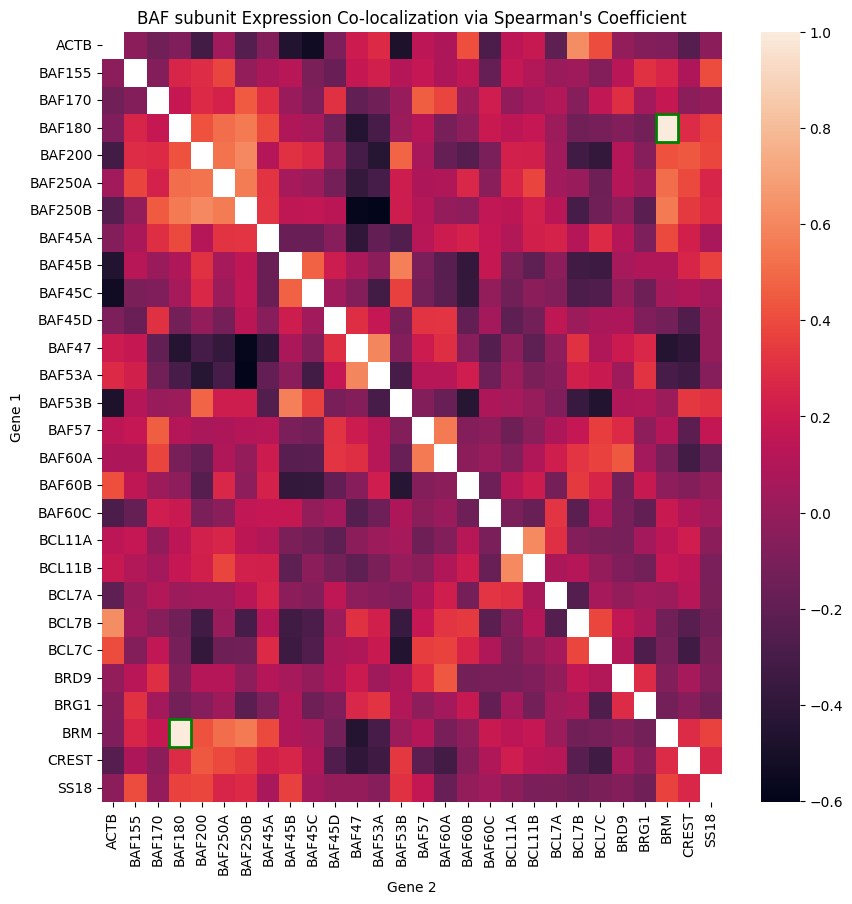

In [162]:
plt.figure(figsize=(10,10))

sns.heatmap(bafspearman)

def highlight_cells(data, threshold=0.75):
    # Create a mask for cells to be highlighted
    mask = data > threshold
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if mask.iloc[i, j]:  # If value is above the threshold
                plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='green', lw=2))

highlight_cells(bafspearman)

plt.title("BAF subunit Expression Co-localization via Spearman's Coefficient")
plt.savefig("figures/BAFspearmancolocalization.png")

In [67]:
def clean_owncomplexparalog(indexcol):
    return [x for x in list(set(baf["Own-complex paralog"][indexcol])) if pd.notna(x)]

baf["Own-complex paralog"] = [clean_owncomplexparalog(indexcol) for indexcol in baf.index.to_list()]
baf["Has Paralog"] = [len(i) > 0 for i in baf["Own-complex paralog"]]
has_paralog = baf[baf["Has Paralog"] == True]
has_paralog_unique = has_paralog[["Gene Name", "Own-complex paralog"]]
has_paralog_unique["Own-complex paralog"] = has_paralog_unique["Own-complex paralog"].apply(lambda x: x[0].replace("[","").replace("]", "").split(", ")) 

"""def translate_paralogs(paraloglst):
    paralogtransname = []
    for paralog in paraloglst:
        gtexcode = merged[merged["Gene Name"] == paralog]["GTEXGeneCode"].unique()
        if len(gtexcode) > 0:
            gtexcode = gtexcode[0]
            genename = has_paralog_unique.loc[gtexcode]["Gene Name"]
        else:
            genename = np.NaN
        paralogtransname.append(genename)
    return paralogtransname

has_paralog_unique["Translated Paralogs"] = has_paralog_unique["Own-complex paralog"].apply(translate_paralogs)
has_paralog_unique.head()"""

has_paralog_unique.head()

TypeError: 'float' object is not iterable